<a href="https://colab.research.google.com/github/juanfherrer/mi-primer-repositorio/blob/main/La_funci%C3%B3n_de_ingresos_en_funci%C3%B3n_de_educaci%C3%B3n_y_experiencia_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyecto La función de ingresos en función de educación y experiencia. incluye:

La función de ingresos en función de educación y experiencia.

El cálculo del gradiente.

Derivadas direccionales.

Visualización 3D y curvas de nivel (contour plot).

Un simulador interactivo para que puedas modificar valores y ver los efectos.

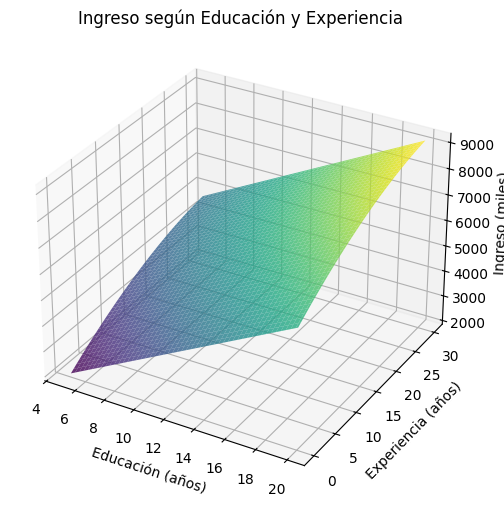

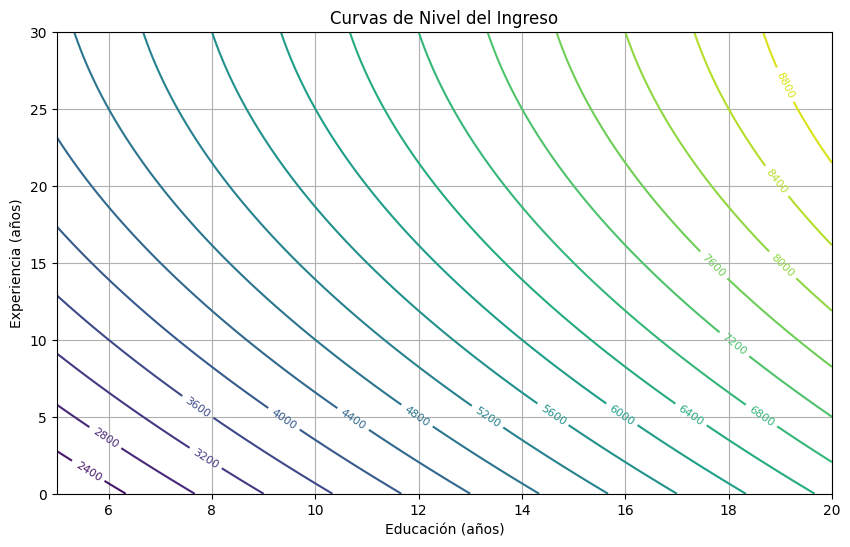

Gradiente en el punto (10, 5): [300 130]
Dirección de mayor crecimiento del ingreso: [0.91755563 0.39760744]


In [1]:
# --- 📦 Librerías ---
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- 📈 Función de ingresos ---
def ingreso(e, x):
    return 500 + 300*e + 150*x - 2*(x**2)

# --- 🔁 Crear malla de valores ---
e_vals = np.linspace(5, 20, 100)  # educación (años)
x_vals = np.linspace(0, 30, 100)  # experiencia (años)
E, X = np.meshgrid(e_vals, x_vals)
Z = ingreso(E, X)

# --- 📊 Gráfica 3D ---
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(E, X, Z, cmap='viridis', alpha=0.8)
ax.set_xlabel('Educación (años)')
ax.set_ylabel('Experiencia (años)')
ax.set_zlabel('Ingreso (miles)')
ax.set_title('Ingreso según Educación y Experiencia')
plt.show()

# --- 📉 Curvas de nivel (contour plot) ---
plt.figure(figsize=(10, 6))
contour = plt.contour(E, X, Z, levels=20, cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)
plt.xlabel('Educación (años)')
plt.ylabel('Experiencia (años)')
plt.title('Curvas de Nivel del Ingreso')
plt.grid(True)
plt.show()

# --- ✅ Cálculo del gradiente en un punto específico ---
def gradiente(e, x):
    df_de = 300
    df_dx = 150 - 4*x
    return np.array([df_de, df_dx])

punto = (10, 5)
grad = gradiente(*punto)

print(f"Gradiente en el punto {punto}: {grad}")
print(f"Dirección de mayor crecimiento del ingreso: {grad / np.linalg.norm(grad)}")


segunda parte del notebook en Google Colab con widgets interactivos para que puedas:

# Mover sliders de educación y experiencia.

Ver cómo cambian el ingreso, el gradiente y las trayectorias de crecimiento.

Usar derivadas direccionales para simular políticas combinadas (educación + experiencia).

**Segunda parte: Simulación interactiva de escenarios**

In [2]:
# --- 📦 Widgets interactividad ---
import ipywidgets as widgets
from IPython.display import display

# --- 💡 Función derivada direccional ---
def derivada_direccional(e, x, u):
    grad = gradiente(e, x)
    return np.dot(grad, u)

# --- 🚀 Función para simular políticas ---
def simular_politica(e=10, x=5, u_e=1, u_x=1):
    ingreso_actual = ingreso(e, x)
    grad = gradiente(e, x)

    # Vector dirección normalizado
    u_vec = np.array([u_e, u_x])
    u_norm = u_vec / np.linalg.norm(u_vec)

    # Derivada direccional
    cambio_ingreso = derivada_direccional(e, x, u_norm)

    # Resultados
    print(f"📍 Punto actual: Educación={e}, Experiencia={x}")
    print(f"💰 Ingreso estimado: {ingreso_actual:.2f} mil pesos")
    print(f"📈 Derivada direccional en dirección ({u_e}, {u_x}): {cambio_ingreso:.2f} mil pesos por unidad de cambio conjunto")
    print(f"🧭 Dirección óptima de mejora: {u_norm.round(2)}")

    # Mostrar punto y dirección en el gráfico de nivel
    plt.figure(figsize=(8,6))
    contour = plt.contour(E, X, Z, levels=20, cmap='viridis')
    plt.clabel(contour, inline=True, fontsize=8)
    plt.xlabel('Educación')
    plt.ylabel('Experiencia')
    plt.grid(True)

    plt.plot(e, x, 'ro', label='Punto Actual')
    plt.quiver(e, x, u_norm[0], u_norm[1], angles='xy', scale_units='xy', scale=0.5, color='r', label='Dirección de Mejora')
    plt.legend()
    plt.title('Simulación de Política de Ingreso')
    plt.show()

# --- 🎛️ Interfaz interactiva ---
interact_ui = widgets.interactive(
    simular_politica,
    e=widgets.IntSlider(min=5, max=20, step=1, value=10, description='Educación'),
    x=widgets.IntSlider(min=0, max=30, step=1, value=5, description='Experiencia'),
    u_e=widgets.FloatSlider(min=-2, max=2, step=0.1, value=1, description='ΔEducación'),
    u_x=widgets.FloatSlider(min=-2, max=2, step=0.1, value=1, description='ΔExperiencia')
)

display(interact_ui)


interactive(children=(IntSlider(value=10, description='Educación', max=20, min=5), IntSlider(value=5, descript…

¿Qué puedes hacer con esto?
Cambiar educación/experiencia y ver el impacto directo en el ingreso.

Probar direcciones de política: ¿subir solo educación? ¿combinado?

Visualizar hacia dónde deben avanzar los programas de formación o empleo.